# Random Forest Classification

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Users\Y\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Y\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#n_estimators : integer, optional (default=10)
#The number of trees in the forest.
#criterion : string, optional (default=”gini”)
#The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the 
#information gain. Note: this parameter is tree-specific.
#max_features : int, float, string or None, optional (default=”auto”)
#The number of features to consider when looking for the best split:

#If int, then consider max_features features at each split.
#If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
#If “auto”, then max_features=sqrt(n_features).
#If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
#If “log2”, then max_features=log2(n_features).
#If None, then max_features=n_features.
#Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

#max_depth : integer or None, optional (default=None)
#The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less 
#than min_samples_split samples

#bootstrap : boolean, optional (default=True)
#Whether bootstrap samples are used when building trees.

#n_jobs : integer, optional (default=1)
#The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.

#class_weight : dict, list of dicts, “balanced”,
#“balanced_subsample” or None, optional (default=None) Weights associated with classes in the form {class_label: weight}. If not
#given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same
#order as the columns of y.

#Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For 
#example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}]
#instead of [{1:1}, {2:5}, {3:1}, {4:1}].

#The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the 
#input data as n_samples / (n_classes * np.bincount(y))

#The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for 
#every tree grown.

#For multi-output, the weights of each column of y will be multiplied.

#Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

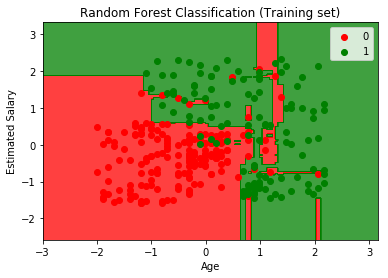

In [8]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

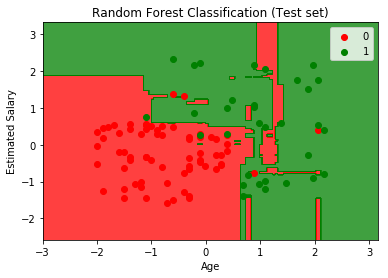

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()